# Loan Default Prediction Project

## Project Overview
This project aims to analyze and predict loan default risks using a real-world dataset. The dataset consists of **255,347** loan applications with **18** features, including demographic details, financial history, and loan attributes. Our goal is to provide insights into the factors influencing loan defaults and build a predictive model to assist financial institutions in making informed lending decisions.

## Dataset Description
The dataset includes the following key features:
- **LoanID**: Unique identifier for each loan
- **Age**: Borrower’s age
- **Income**: Annual income of the borrower
- **LoanAmount**: Amount of loan requested
- **CreditScore**: Credit score of the borrower
- **MonthsEmployed**: Number of months employed
- **NumCreditLines**: Number of active credit lines
- **InterestRate**: Interest rate assigned to the loan
- **LoanTerm**: Duration of the loan in months
- **DTIRatio**: Debt-to-Income ratio
- **Education**: Highest education level attained
- **EmploymentType**: Type of employment (Full-time, Part-time, etc.)
- **MaritalStatus**: Marital status of the borrower
- **HasMortgage**: Whether the borrower has an existing mortgage (Yes/No)
- **HasDependents**: Whether the borrower has dependents (Yes/No)
- **LoanPurpose**: Purpose of the loan (Auto, Business, Other, etc.)
- **HasCoSigner**: Whether the loan has a co-signer (Yes/No)
- **Default**: Target variable indicating if the borrower defaulted (1 = Default, 0 = No Default)

## Initial Analysis
- The dataset contains **no missing values**, ensuring a clean start for analysis.
- The age range of borrowers spans from **18 to 69 years**.
- Loan amounts vary widely, from **$5,000 to $249,999**.
- Credit scores range between **300 and 849**, providing significant variation.
- The average debt-to-income (DTI) ratio is approximately **0.5**, indicating varying levels of financial stability among borrowers.
- Around **11.6%** of loans in the dataset have resulted in default.

## Next Steps
1. Perform exploratory data analysis (EDA) to uncover trends and correlations.
2. Engineer relevant features to improve predictive accuracy.
3. Train machine learning models to classify loan defaults.
4. Optimize the model for better performance and interpretability.

This analysis will help financial institutions mitigate risks and make data-driven lending decisions. Further insights will be shared as we progress.



In [ ]:
#lets start with data overview and some statustuucs and informations 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv("/kaggle/input/loan-default/Loan_default.csv")

# Display the first five rows
df.head()


In [250]:
df.shape

(255347, 18)

In [251]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [252]:
# Check for missing values
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [253]:
# Show basic statistics for numerical features
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [254]:
# Show basic statistics for categorical features
df.describe(include="object")

,LoanID,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
count,255347,255347,255347,255347,255347,255347,255347,255347
unique,255347,4,4,3,2,2,5,2
top,I38PQUQS96,Bachelor's,Part-time,Married,Yes,Yes,Business,Yes
freq,1,64366,64161,85302,127677,127742,51298,127701


In [255]:
# Check the distribution of the target variable (Default)
print(df["Default"].value_counts(normalize=True) * 100)  # Percentage format

Default
0    88.387175
1    11.612825
Name: proportion, dtype: float64


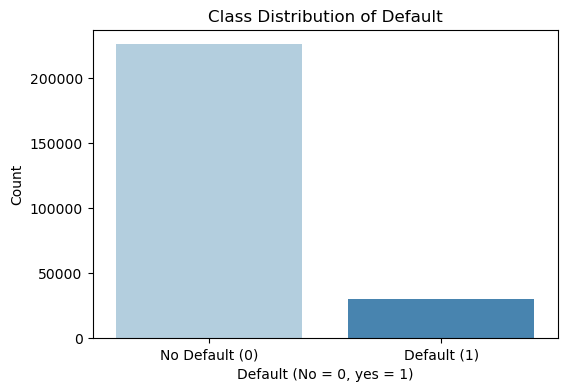

In [257]:
#lets plot this imbalanced distribution 
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Default"].value_counts().index, y=df["Default"].value_counts(), palette="Blues")
plt.title("Class Distribution of Default")
plt.xlabel("Default (No = 0, yes = 1)")
plt.ylabel("Count")
plt.xticks([0, 1], ["No Default (0)", "Default (1)"])
plt.show()


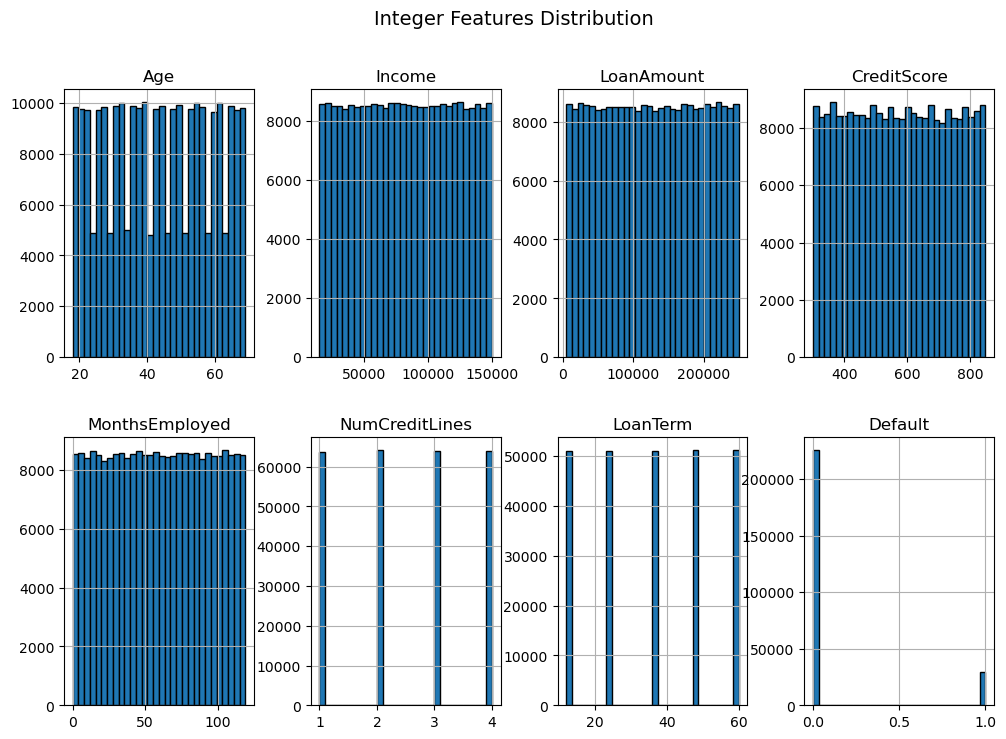

In [259]:
#lets make some visualizations 
#Here is the visualization for the integer features.
# Visualizing only the integer features
import matplotlib.pyplot as plt
import seaborn as sns
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Plot integer features
df[int_columns].hist(bins=30, edgecolor='black', layout=(2, 4), figsize=(12, 8))
plt.suptitle("Integer Features Distribution", fontsize=14)
plt.show()



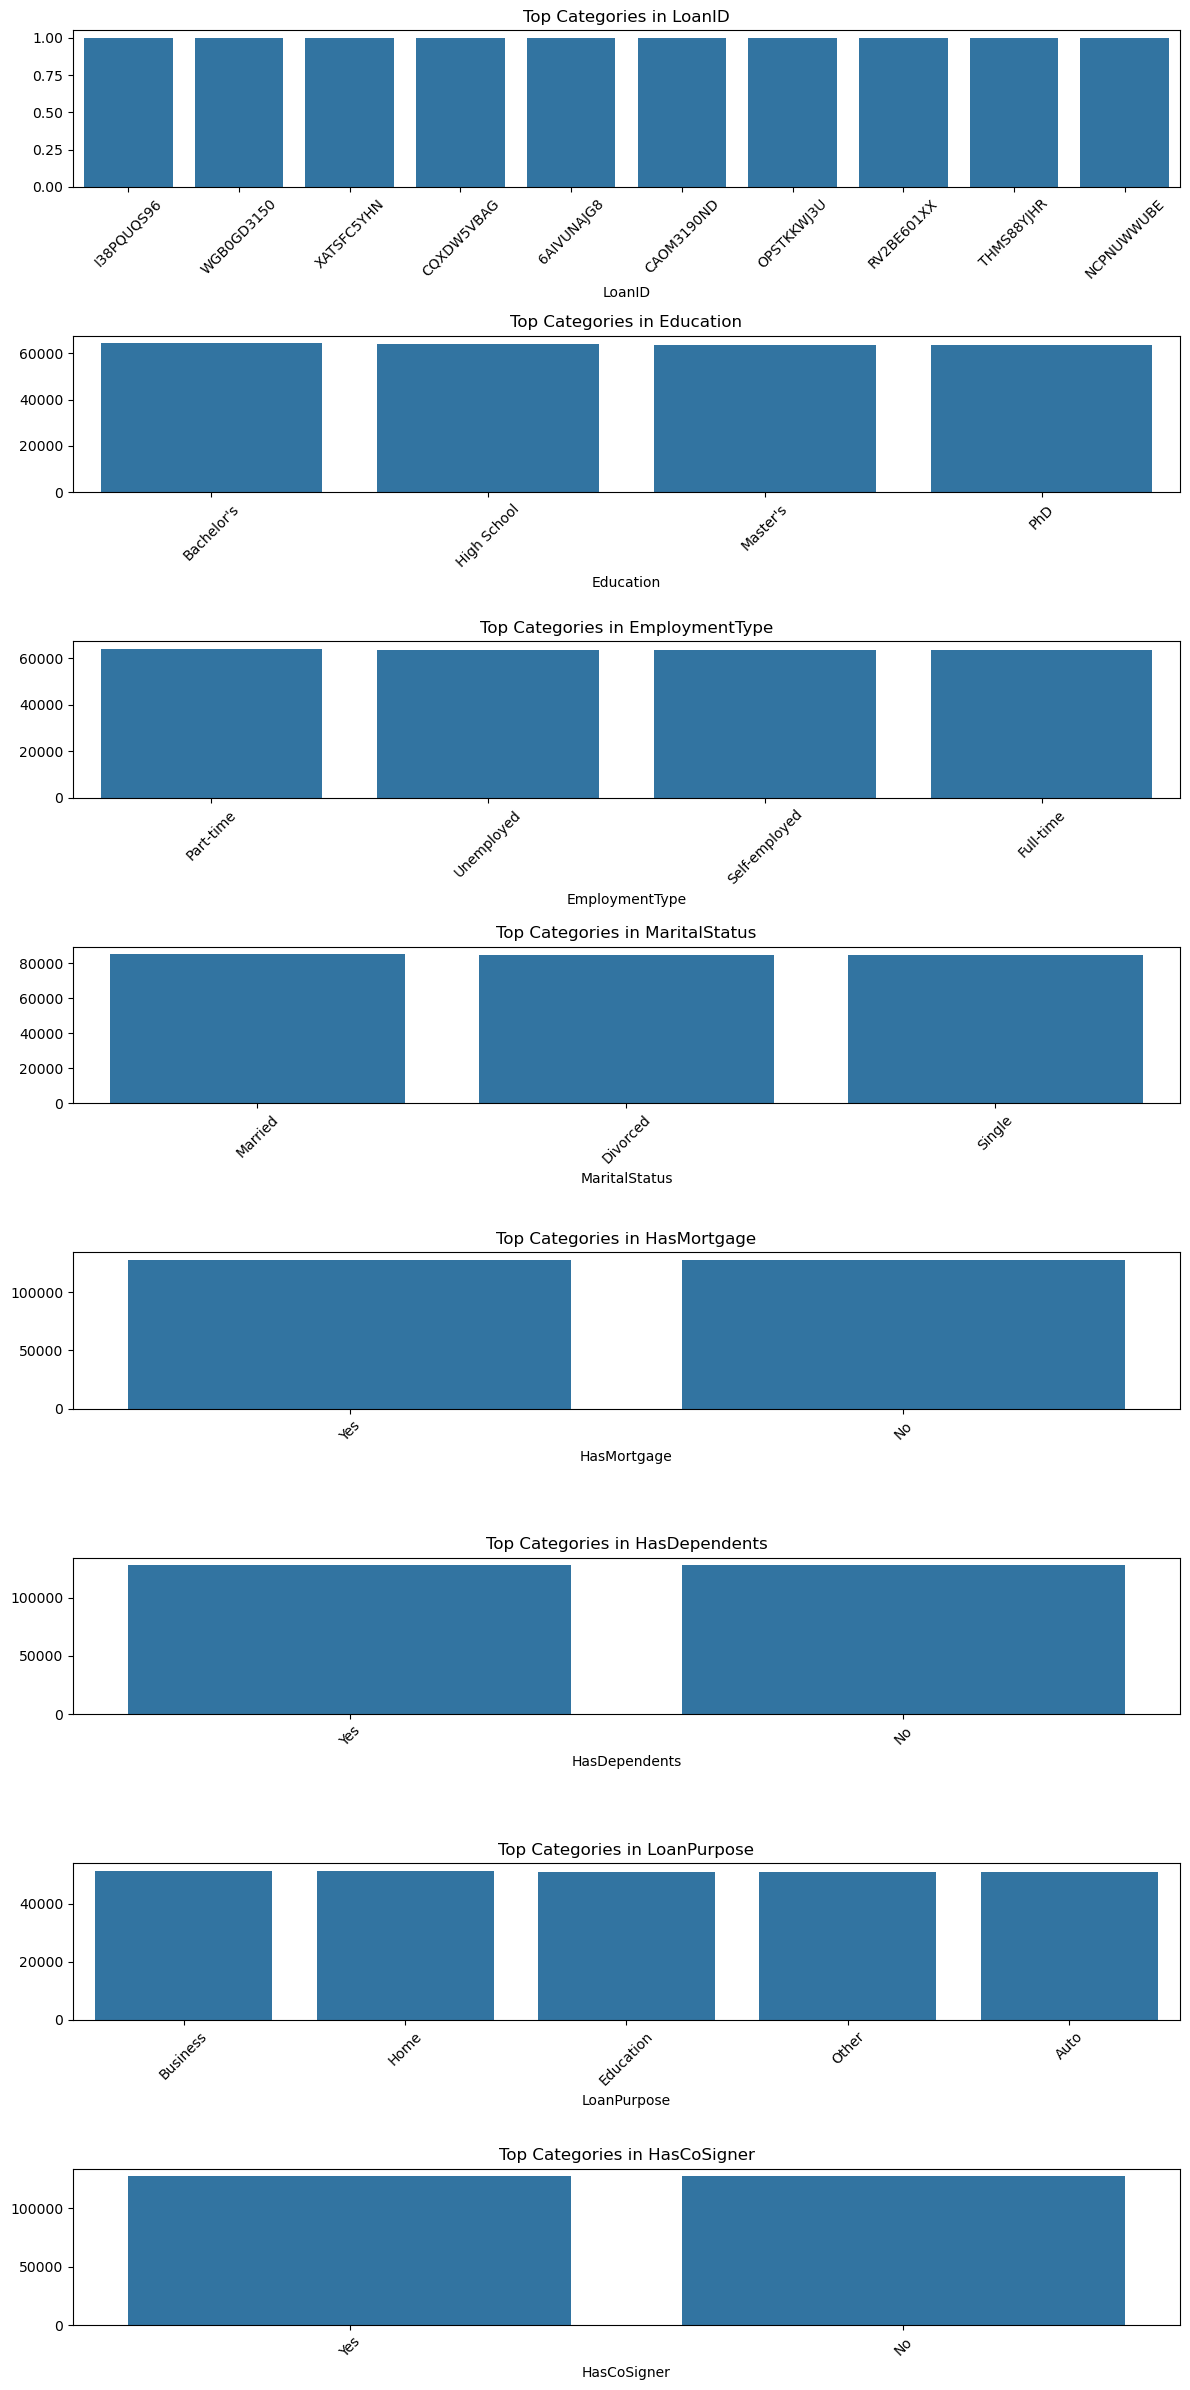

In [261]:
#Here is the visualization for the object (categorical) features.

# identifying object (categorical) columns
object_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot categorical features (showing top categories for each feature)
fig, axes = plt.subplots(len(object_columns), 1, figsize=(12, 3 * len(object_columns)))

for i, col in enumerate(object_columns):
    value_counts = df[col].value_counts().head(10)  # Show top 10 categories only
    sns.barplot(x=value_counts.index, y=value_counts.values, ax=axes[i])
    axes[i].set_title(f"Top Categories in {col}")
    axes[i].set_xticklabels(value_counts.index, rotation=45)

plt.tight_layout()
plt.show()


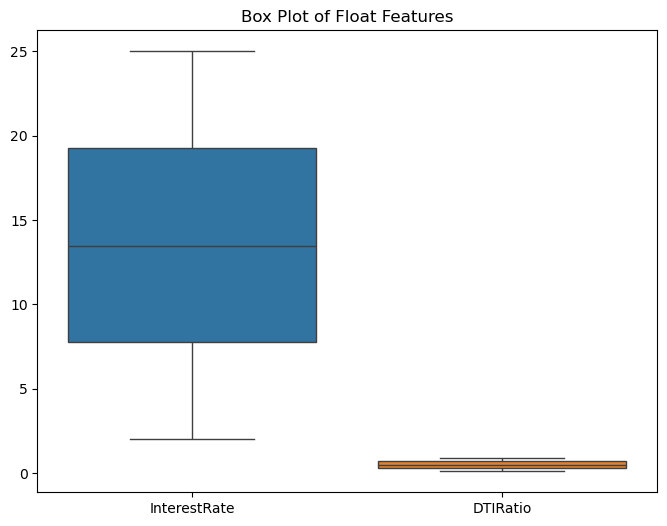

In [262]:
# Box plot for float features to detect outliers
# identifying float columns
float_columns = df.select_dtypes(include=['float64']).columns.tolist()

# Box plot for float features to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[float_columns])
plt.title("Box Plot of Float Features")
plt.show()



## Data Preprocessing

Now that we have explored and visualized the dataset, the next step is **data preprocessing** to ensure data quality before building models. This includes:

1. **Handling Missing Values** – Identify and manage any missing or null values.
2. **Dealing with Outliers** – Address extreme values that could affect model performance.
3. **Encoding Categorical Variables** – Convert object (categorical) features into numerical representations.
4. **Feature Scaling** – Normalize or standardize numerical features if necessary.
5. **Handling Class Imbalance** – Apply techniques such as oversampling, undersampling, or SMOTE if needed.

Let's start with handling missing values.


In [266]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check if there are any hidden missing values (like empty strings)
print((df == "").sum())  # Count empty strings
print(df.isin(["NA", "N/A", "null", "None"]).sum())  # Count special missing indicators



Missing Values:
 Series([], dtype: int64)
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [267]:
#Dealing with Outliers 
# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Detect outliers in float and integer columns
outliers = detect_outliers(df, float_columns + int_columns)
print("Outlier counts per column:", outliers)



Outlier counts per column: {'InterestRate': 0, 'DTIRatio': 0, 'Age': 0, 'Income': 0, 'LoanAmount': 0, 'CreditScore': 0, 'MonthsEmployed': 0, 'NumCreditLines': 0, 'LoanTerm': 0, 'Default': 29653}


In [268]:
for col in object_columns:
    print(f"{col}: {df[col].unique()}")

LoanID: ['I38PQUQS96' 'HPSK72WA7R' 'C1OZ6DPJ8Y' ... 'XQK1UUUNGP' 'JAO28CPL4H'
 'ZTH91CGL0B']
Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']


In [269]:
print(df.columns)  # Should list 'EmploymentType', 'MaritalStatus', 'LoanPurpose'

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


In [270]:
df[["EmploymentType", "MaritalStatus", "LoanPurpose"]] = df[
    ["EmploymentType", "MaritalStatus", "LoanPurpose"]
].astype(str)


In [273]:
#Encoding Categorical Variables
from sklearn.preprocessing import LabelEncoder

# Drop LoanID as it's not useful for modeling
df.drop(columns=["LoanID"], inplace=True, errors="ignore")

# Label Encoding for 'Education'
education_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
df["Education"] = df["Education"].map(education_order)

# One-Hot Encoding for nominal categorical variables
df = pd.get_dummies(df, columns=["EmploymentType", "MaritalStatus", "LoanPurpose"], drop_first=True)

# Convert binary categorical variables to 0 and 1
binary_columns = ["HasMortgage", "HasDependents", "HasCoSigner"]
df[binary_columns] = df[binary_columns].apply(lambda x: x.map({"No": 0, "Yes": 1}))

# Print final dataframe structure
print(df.head())


   Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   InterestRate  LoanTerm  DTIRatio  Education  ...  Default  \
0         15.23        36      0.44          1  ...        0   
1          4.81        60      0.68          2  ...        0   
2         21.17        24      0.31          2  ...        1   
3          7.07        24      0.23          0  ...        0   
4          6.51        48      0.73          1  ...        0   

   EmploymentType_Part-time  EmploymentType_Self-employed  \
0                     False                         False   
1                     False               

In [274]:
print(y.dtype)  # Should be int or categorical
print(y.unique())  # Should show only 0 and 1

int32
[0 1]


In [276]:
df["Default"] = df["Default"].astype(int)  # Ensure it's an integer

In [277]:
print(X.isnull().sum())  # Check number of missing values per column

Age                             0
Income                          0
LoanAmount                      0
CreditScore                     0
MonthsEmployed                  0
NumCreditLines                  0
InterestRate                    0
LoanTerm                        0
DTIRatio                        0
Education                       0
HasMortgage                     0
HasDependents                   0
HasCoSigner                     0
EmploymentType_Part-time        0
EmploymentType_Self-employed    0
EmploymentType_Unemployed       0
MaritalStatus_Married           0
MaritalStatus_Single            0
LoanPurpose_Business            0
LoanPurpose_Education           0
LoanPurpose_Home                0
LoanPurpose_Other               0
dtype: int64


In [278]:
print(X.columns)  # See all available columns

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education',
       'HasMortgage', 'HasDependents', 'HasCoSigner',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')


In [279]:
print(X.dtypes)

Age                               int64
Income                            int64
LoanAmount                        int64
CreditScore                       int64
MonthsEmployed                    int64
NumCreditLines                    int64
InterestRate                    float64
LoanTerm                          int64
DTIRatio                        float64
Education                         int32
HasMortgage                       int64
HasDependents                     int64
HasCoSigner                       int64
EmploymentType_Part-time           bool
EmploymentType_Self-employed       bool
EmploymentType_Unemployed          bool
MaritalStatus_Married              bool
MaritalStatus_Single               bool
LoanPurpose_Business               bool
LoanPurpose_Education              bool
LoanPurpose_Home                   bool
LoanPurpose_Other                  bool
dtype: object


In [281]:
print(X["Education"].unique())

[1 2 0 3]


In [282]:
print(df["Education"].unique())

[1 2 0 3]


In [283]:
import pandas as pd

# Reload the dataset 
df_original = pd.read_csv("Loan_default.csv")  

# Check unique values in 'Education'
print(df_original["Education"].unique())


["Bachelor's" "Master's" 'High School' 'PhD']


In [285]:
# Define the correct mapping
education_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}

# Restore the 'Education' column in df
df["Education"] = df_original["Education"].map(education_order)

# Fill missing values with the most common category
most_frequent_education = df["Education"].mode()[0]
df["Education"].fillna(most_frequent_education, inplace=True)

# Convert to integer type
df["Education"] = df["Education"].astype(int)

# Assign the fixed column back to X
X["Education"] = df["Education"]

# Final check
print(df["Education"].unique())  # Should be [0, 1, 2, 3]
print(df["Education"].isnull().sum())  # Should be 0


[1 2 0 3]
0


In [287]:
education_order = {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}

# Re-map the original 'Education' values
df["Education"] = df_original["Education"].map(education_order)

# Fill NaN values with the most common category
most_frequent_education = df["Education"].mode()[0]
df["Education"].fillna(most_frequent_education, inplace=True)

# Ensure it's integer type
df["Education"] = df["Education"].astype(int)

print(df["Education"].unique())  # Should return [0, 1, 2, 3]
print(df["Education"].isnull().sum())  # Should return 0


[1 2 0 3]
0


In [288]:
most_frequent_education = X["Education"].mode()[0]  # Get most common value
X["Education"].fillna(most_frequent_education, inplace=True)

In [294]:
#Handling Class Imbalance
from imblearn.over_sampling import SMOTE

# Define features and target
X = df.drop(columns=["Default"])  # Features
y = df["Default"]  # Target

# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(y_resampled.value_counts())  # Check new class distribution
# Check class distribution after SMOTE in percentage format
print(y_resampled.value_counts(normalize=True) * 100)

Default
0    225694
1    225694
Name: count, dtype: int64
Default
0    50.0
1    50.0
Name: proportion, dtype: float64


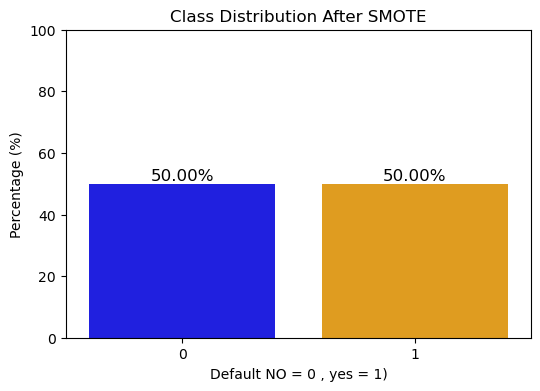

In [303]:
# Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled.value_counts().index, 
            y=y_resampled.value_counts(normalize=True) * 100, 
            palette=["blue", "orange"])

plt.xlabel("Default NO = 0 , yes = 1)")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution After SMOTE")
plt.ylim(0, 100)

# Show values on bars
for i, v in enumerate(y_resampled.value_counts(normalize=True) * 100):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12)

plt.show()


## **Modeling Step**  

Now that we have preprocessed the data, we will proceed with building and evaluating machine learning models.  

### **Steps in this Phase:**  
1. **Splitting the Data:**  
   - Divide the dataset into training and testing sets.  

2. **Training Models:**  
   - Train multiple models and compare their performance.  

3. **Hyperparameter Tuning:**  
   - Optimize the best-performing model for better accuracy.  

4. **Evaluation:**  
   - Assess the model using various performance metrics.  

Let's begin with splitting the data!


In [311]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

# Print shapes of resulting sets
print(f"Training set: {X_train.shape}, {y_train.shape}")
print(f"Testing set: {X_test.shape}, {y_test.shape}")


Training set: (361110, 22), (361110,)
Testing set: (90278, 22), (90278,)


In [315]:
import time
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    
    start_time = time.time()  # Start timer
    
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test set
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    
    end_time = time.time()  # End timer
    elapsed_time = end_time - start_time  # Compute time taken
    
    results[name] = {"Accuracy": acc, "Time (seconds)": elapsed_time}
    
    print(f"{name} Accuracy: {acc:.4f} | Time Taken: {elapsed_time:.2f} sec")

# Display results in a sorted manner (by accuracy)
print("\nFinal Results:")
sorted_results = sorted(results.items(), key=lambda x: x[1]["Accuracy"], reverse=True)
for name, metrics in sorted_results:
    print(f"{name}: Accuracy = {metrics['Accuracy']:.4f}, Time = {metrics['Time (seconds)']:.2f} sec")


Training Logistic Regression...
Logistic Regression Accuracy: 0.7891 | Time Taken: 49.82 sec
Training Random Forest...
Random Forest Accuracy: 0.9084 | Time Taken: 144.62 sec
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.9066 | Time Taken: 182.64 sec

Final Results:
Random Forest: Accuracy = 0.9084, Time = 144.62 sec
Gradient Boosting: Accuracy = 0.9066, Time = 182.64 sec
Logistic Regression: Accuracy = 0.7891, Time = 49.82 sec


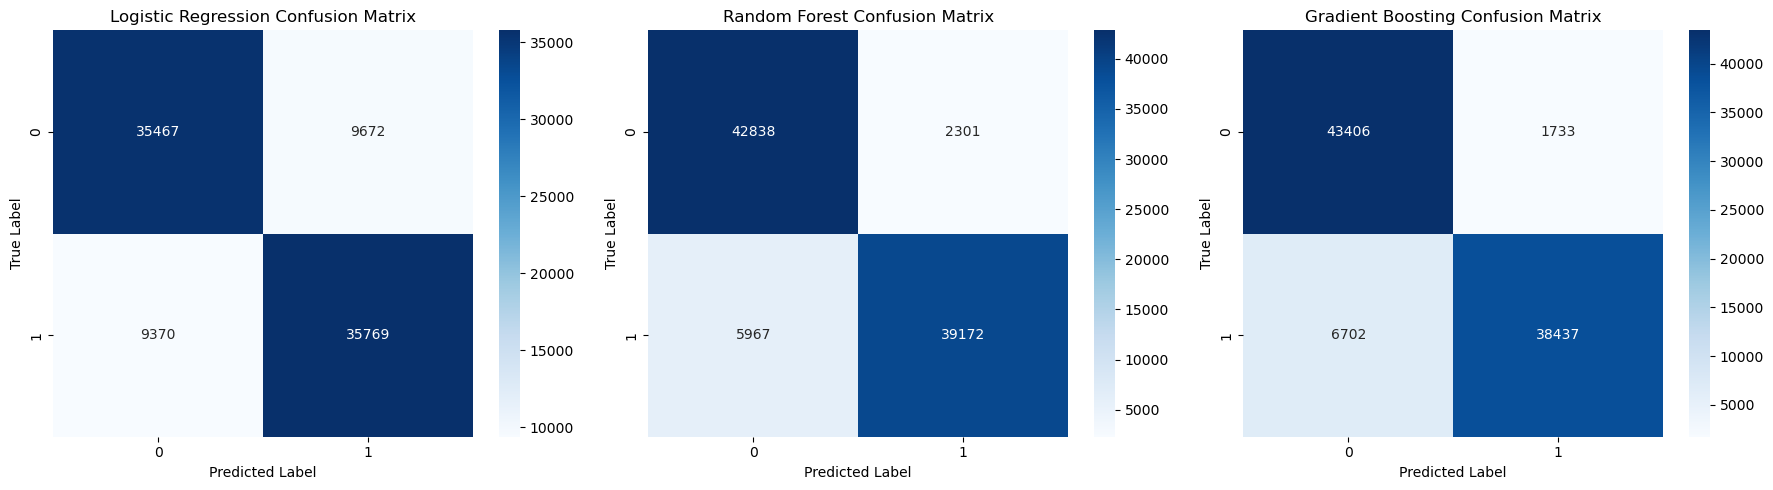

In [317]:
#before optimizing we need to visualize the three models perfomance frist
from sklearn.metrics import confusion_matrix

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Generate confusion matrices for each model
for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)  # Get predictions
    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"{name} Confusion Matrix")
    axes[i].set_xlabel("Predicted Label")
    axes[i].set_ylabel("True Label")

# Show plots
plt.tight_layout()
plt.show()


In [325]:
# lets optimize RF model
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score
import time
import numpy as np

# Define improved hyperparameter grid
param_grid = {
    "n_estimators": [150, 200, 250, 300],  # More trees for better stability
    "max_depth": [20, 30, None],  # Allow deeper trees
    "min_samples_split": [2, 5],  # Keep splits minimal
    "min_samples_leaf": [1, 2]  # Maintain small leaf sizes
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# Use Halving Grid Search for structured tuning
halving_search = HalvingGridSearchCV(
    rf, param_grid=param_grid,  
    factor=2,  # Reduce candidates gradually
    min_resources="smallest",  # Automatically choose minimal starting data
    cv=2,  # Reduce cross-validation folds for speed
    scoring="accuracy", 
    n_jobs=-1,  # Utilize all CPU cores
    verbose=1,  # Reduce output verbosity
    random_state=42
)

# Start timing
start_time = time.time()
halving_search.fit(X_train, y_train)
end_time = time.time()

# Get best model and hyperparameters
best_rf = halving_search.best_estimator_
best_params = halving_search.best_params_

# Evaluate model on test set
y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("\nBest Hyperparameters:", best_params)
print(f"Optimized Random Forest Accuracy: {accuracy:.4f} | Time Taken: {end_time - start_time:.2f} sec")


n_iterations: 6
n_required_iterations: 6
n_possible_iterations: 16
min_resources_: 8
max_resources_: 361110
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 48
n_resources: 8
Fitting 2 folds for each of 48 candidates, totalling 96 fits
----------
iter: 1
n_candidates: 24
n_resources: 16
Fitting 2 folds for each of 24 candidates, totalling 48 fits
----------
iter: 2
n_candidates: 12
n_resources: 32
Fitting 2 folds for each of 12 candidates, totalling 24 fits
----------
iter: 3
n_candidates: 6
n_resources: 64
Fitting 2 folds for each of 6 candidates, totalling 12 fits
----------
iter: 4
n_candidates: 3
n_resources: 128
Fitting 2 folds for each of 3 candidates, totalling 6 fits
----------
iter: 5
n_candidates: 2
n_resources: 256
Fitting 2 folds for each of 2 candidates, totalling 4 fits

Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.9007 | Time Taken: 432.87 sec


In [341]:
import xgboost as xgb
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import accuracy_score
import time

# Define XGBoost Classifier
xgb_clf = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Use HalvingGridSearchCV for faster hyperparameter tuning
grid_search = HalvingGridSearchCV(
    xgb_clf, param_grid, factor=2, cv=3, scoring='accuracy', n_jobs=-1, verbose=2
)

start_time = time.time()
grid_search.fit(X_train, y_train)
end_time = time.time()

# Get best parameters
best_params = grid_search.best_params_
print("Best Parameters for XGBoost:", best_params)

# Train best model without early stopping
best_xgb = xgb.XGBClassifier(**best_params, eval_metric='logloss', use_label_encoder=False)
best_xgb.fit(X_train, y_train)

# Predict
y_pred = best_xgb.predict(X_test)

# Accuracy
xgb_accuracy = accuracy_score(y_test, y_pred)
elapsed_time = end_time - start_time

print(f"Optimized XGBoost Accuracy: {xgb_accuracy:.4f} | Time Taken: {elapsed_time:.2f} sec")


n_iterations: 7
n_required_iterations: 7
n_possible_iterations: 7
min_resources_: 5642
max_resources_: 361110
aggressive_elimination: False
factor: 2
----------
iter: 0
n_candidates: 72
n_resources: 5642
Fitting 3 folds for each of 72 candidates, totalling 216 fits
----------
iter: 1
n_candidates: 36
n_resources: 11284
Fitting 3 folds for each of 36 candidates, totalling 108 fits
----------
iter: 2
n_candidates: 18
n_resources: 22568
Fitting 3 folds for each of 18 candidates, totalling 54 fits
----------
iter: 3
n_candidates: 9
n_resources: 45136
Fitting 3 folds for each of 9 candidates, totalling 27 fits
----------
iter: 4
n_candidates: 5
n_resources: 90272
Fitting 3 folds for each of 5 candidates, totalling 15 fits
----------
iter: 5
n_candidates: 3
n_resources: 180544
Fitting 3 folds for each of 3 candidates, totalling 9 fits
----------
iter: 6
n_candidates: 2
n_resources: 361088
Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for XGBoost: {'colsample_bytr

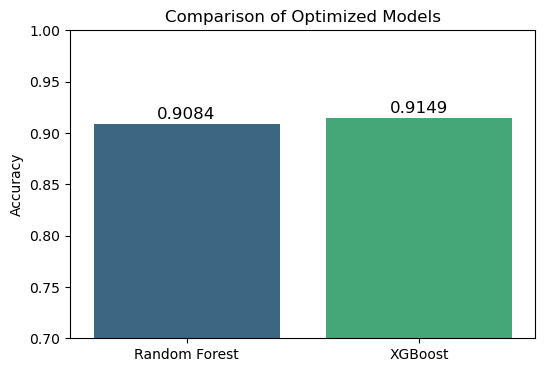

In [345]:
#lets visualize after optimizing the two models
import matplotlib.pyplot as plt
import seaborn as sns

# Replace these with actual values from your optimized models
rf_accuracy = 0.9084  # Optimized Random Forest accuracy
xgb_accuracy = 0.9149  # Optimized XGBoost accuracy

# Model names and their accuracies
models = ["Random Forest", "XGBoost"]
accuracies = [rf_accuracy, xgb_accuracy]

# Create the plot
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=accuracies, palette="viridis")

# Add labels and title
plt.ylim(0.7, 1)  # Set y-axis range
plt.ylabel("Accuracy")
plt.title("Comparison of Optimized Models")

# Show values on bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.005, f"{acc:.4f}", ha='center', fontsize=12)

plt.show()


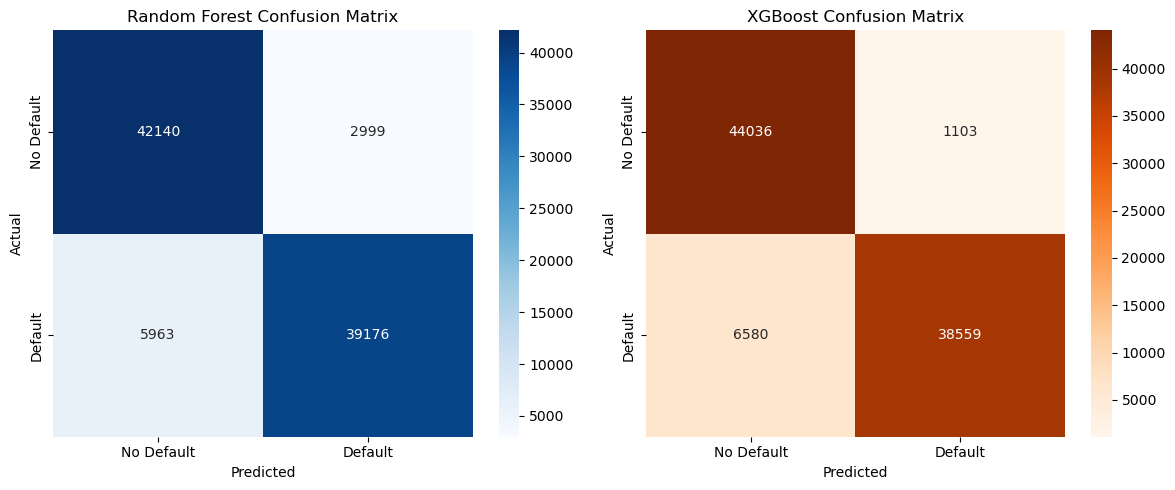

In [349]:
#lets visalize with confusion matrix 
from sklearn.metrics import confusion_matrix

# Get predictions for both models
rf_y_pred = best_rf.predict(X_test)
xgb_y_pred = best_xgb.predict(X_test)

# Compute confusion matrices
rf_cm = confusion_matrix(y_test, rf_y_pred)
xgb_cm = confusion_matrix(y_test, xgb_y_pred)

# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"], ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Oranges", xticklabels=["No Default", "Default"], yticklabels=["No Default", "Default"], ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")

plt.tight_layout()
plt.show()


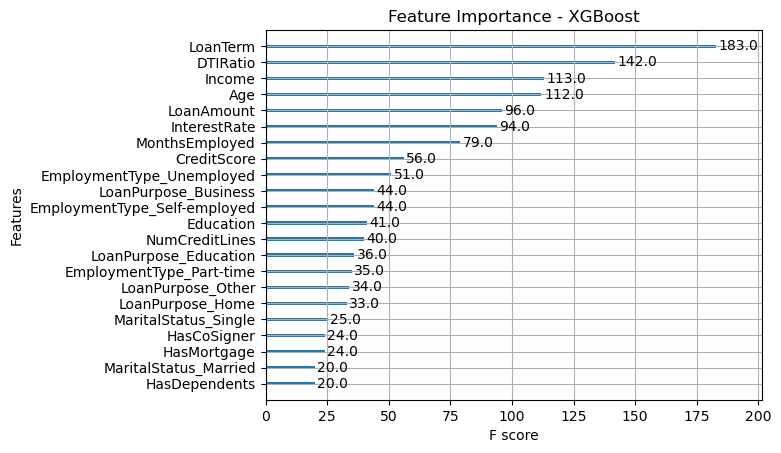

In [351]:
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(best_xgb)
plt.title("Feature Importance - XGBoost")
plt.show()


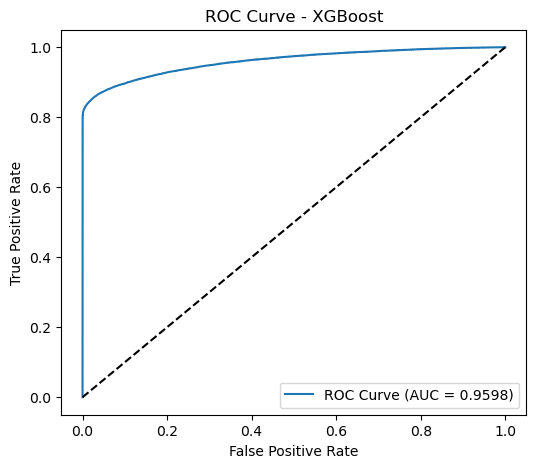

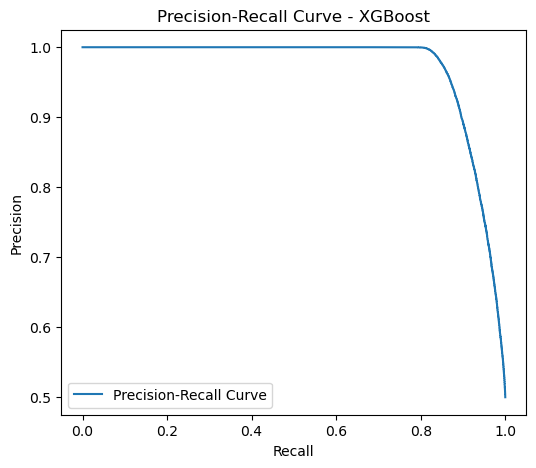

In [353]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC Curve
y_prob = best_xgb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - XGBoost")
plt.legend()
plt.show()


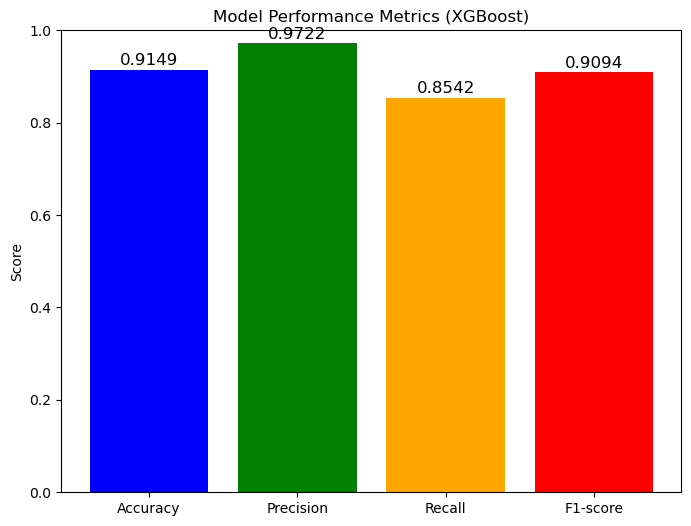

In [355]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Get predictions
y_pred = best_xgb.predict(X_test)

# Compute metrics
metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1-score": f1_score(y_test, y_pred)
}

# Plot metrics
plt.figure(figsize=(8, 6))
plt.bar(metrics.keys(), metrics.values(), color=['blue', 'green', 'orange', 'red'])

# Add value labels
for i, v in enumerate(metrics.values()):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center', fontsize=12)

# Labels and title
plt.ylabel("Score")
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.title("Model Performance Metrics (XGBoost)")
plt.show()


In [357]:
import joblib

# Print the features in X before saving
print(f" Number of features in X: {X.shape[1]}")
print(f" Feature names in X: {list(X.columns)}")

# Check if there were any issues with one-hot encoding
print(f" Unique values in y: {y.unique()}")


 Number of features in X: 22
 Feature names in X: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']
 Unique values in y: [0 1]


In [359]:
import joblib

# Save the correct feature names
columns_used = X.columns
joblib.dump(columns_used, "columns_used.pkl")
print(" Correct feature names saved in 'columns_used.pkl'!")


 Correct feature names saved in 'columns_used.pkl'!


In [361]:
# Print the features in X before saving the scaler
print(f"Number of features in X (before saving scaler): {X.shape[1]}")
print(f"Feature names in X: {list(X.columns)}")


Number of features in X (before saving scaler): 22
Feature names in X: ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'Education', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'EmploymentType_Part-time', 'EmploymentType_Self-employed', 'EmploymentType_Unemployed', 'MaritalStatus_Married', 'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other']


In [365]:
from sklearn.preprocessing import StandardScaler
import joblib

# Train a new StandardScaler with the correct features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Use the correct X

# Save the new scaler
joblib.dump(scaler, "scaler.pkl")
print(" Scaler has been correctly trained and saved as 'scaler.pkl'!")


 Scaler has been correctly trained and saved as 'scaler.pkl'!


In [373]:
import joblib
joblib.dump(model, 'xgboost_model.pkl')
print ('xgboost_model.pkl sved successfully')

xgboost_model.pkl sved successfully
